# Introduction to Meteostat

This is a code for introducing the Meteostat package for the posterior use in climate analysis.

## Importing packages

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Point

Creating a point of interest in Puebla city.

In [2]:
from meteostat import Point

In [3]:
puebla = Point(19.12, -98.28,2170)

## Stations & Fetch

In [4]:
from meteostat import Stations

### Region

Getting stations in Puebla State, Mexico.

In [5]:
stations = Stations()
stations = stations.region('MX','PUE')
stations = stations.fetch(stations.count())

print(stations)

                           name country region    wmo  icao  latitude  \
id                                                                      
76685              Puebla, Pue.      MX    PUE  76685  MMPB   19.0500   
MMHC0  Tehuacan / Cinco Señores      MX    PUE   <NA>  MMHC   18.4971   

       longitude  elevation             timezone hourly_start hourly_end  \
id                                                                         
76685   -98.1667     2179.0  America/Mexico_City   1973-01-02 2024-09-19   
MMHC0   -97.4198     1679.0  America/Mexico_City   1973-01-01 1977-02-01   

      daily_start  daily_end monthly_start monthly_end  
id                                                      
76685  1975-04-04 2024-12-30    1988-01-01  2022-01-01  
MMHC0         NaT        NaT           NaT         NaT  


### Nearby

Getting the nearest station to the coordinate.

In [6]:
stations = Stations()
stations = stations.nearby(19.12, -98.28)
stations = stations.fetch(1)

print(stations)

               name country region    wmo  icao  latitude  longitude  \
id                                                                     
76685  Puebla, Pue.      MX    PUE  76685  MMPB     19.05   -98.1667   

       elevation             timezone hourly_start hourly_end daily_start  \
id                                                                          
76685     2179.0  America/Mexico_City   1973-01-02 2024-09-19  1975-04-04   

       daily_end monthly_start monthly_end      distance  
id                                                        
76685 2024-12-30    1988-01-01  2022-01-01  14224.477944  


## Hourly Data

Getting hourly data from the station.

In [24]:
from datetime import datetime
from meteostat import Hourly

#Set time period
start = datetime(2024, 9, 14, 00, 00)
end = datetime(2024, 9, 14, 23, 59)

#Get hourly data
data = Hourly(stations.wmo[0],start, end)
data = data.fetch()

data.head()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2024-09-14 00:00:00,19.0,16.0,83.0,1.9,NaN,180.0,11.0,NaN,1025.0,NaN,9.0
2024-09-14 01:00:00,17.0,15.0,88.0,0.4,NaN,70.0,9.0,NaN,1026.0,NaN,8.0
2024-09-14 02:00:00,15.8,15.2,96.0,0.0,NaN,42.0,7.2,NaN,1016.9,NaN,3.0
2024-09-14 03:00:00,15.6,14.6,94.0,0.3,NaN,107.0,11.2,NaN,1018.0,NaN,8.0
2024-09-14 04:00:00,15.5,14.9,96.0,0.5,NaN,65.0,6.8,NaN,1018.7,NaN,8.0


Visualizing data.

<Axes: xlabel='time', ylabel='temp'>

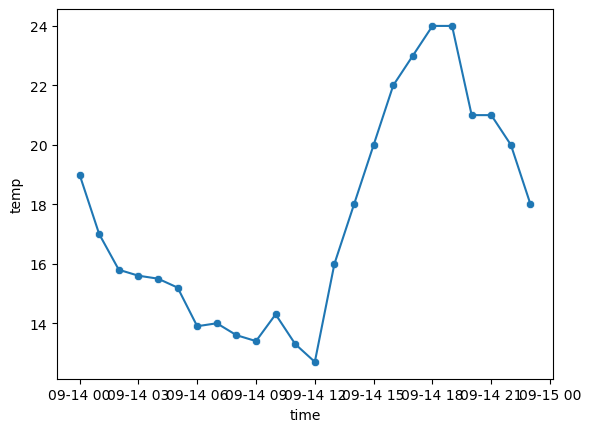

In [8]:
sns.scatterplot(x='time', y='temp', data=data)
sns.lineplot(x='time', y='temp', data=data)

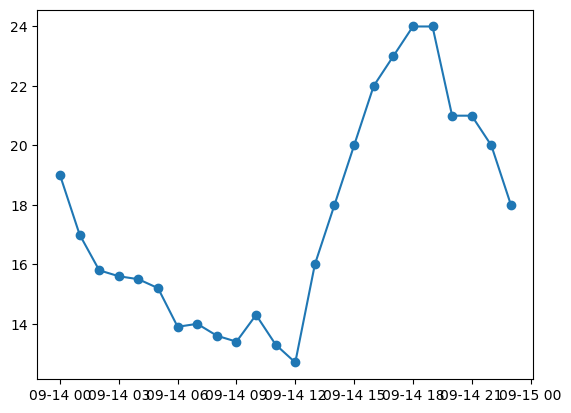

In [9]:
plt.scatter(x = data.index, y = data['temp'])
plt.plot(data.index, data['temp'])

### Coverage

In [23]:
from datetime import datetime
from meteostat import Hourly

start = datetime(1974, 9, 16)
end = datetime(2024, 9, 16)

data = Hourly('76685', start=start, end=end)
coverage_50_years = data.coverage()

start = datetime(1994, 9, 16)
end = datetime(2024, 9, 16)

data = Hourly('76685', start = start, end = end)
coverage_30_years = data.coverage()

print('For 50 years the coverage is ' + '{:.2f}'.format(coverage_50_years * 100) 
      + '% and for 30 years is ' + '{:.2f}'.format(coverage_30_years * 100) + '%')

For 50 years the coverage is 39.54% and for 30 years is 50.45%


## Daily Data

In [11]:
from meteostat import Daily

In [12]:
start = datetime(1974, 1, 1)
end = datetime(2024, 1, 1)

data = Daily('76685', start, end)
data = data.fetch()

data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1975-04-04,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-04-06,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-04-07,20.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-04-08,23.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-04-09,18.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Visualizing data.

<Axes: xlabel='time', ylabel='tavg'>

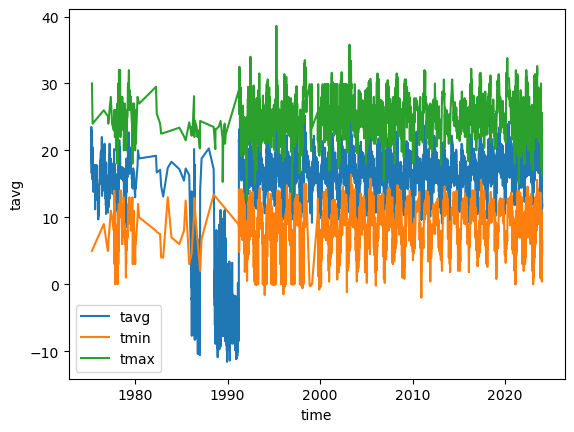

In [13]:
sns.lineplot(x='time', y='tavg', data=data, label='tavg')
sns.lineplot(x='time', y='tmin', data=data, label='tmin')
sns.lineplot(x='time', y='tmax', data=data, label='tmax')

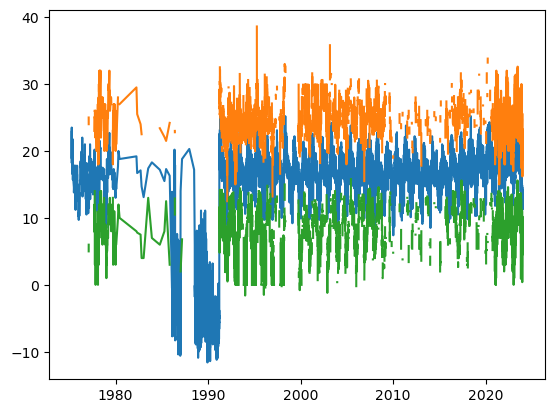

In [14]:
plt.plot(data.index, data['tavg'], label='tavg')
plt.plot(data.index, data['tmax'], label='tmax')
plt.plot(data.index, data['tmin'], label='tmin')

### Normalize

Normalizing before intepolation.

In [15]:
start = datetime(1994, 1, 1)
end = datetime(2024, 1, 1)

data = Daily('76685', start=start, end=end)
data = data.normalize()
data = data.fetch()

data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1994-01-01,14.3,5.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-02,16.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-03,14.1,0.0,21.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-04,14.0,2.8,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-05,10.6,-1.6,23.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


### Interpolate

Interpolating the gaps within data.

In [16]:
data = data.interpolate()
data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1994-01-01,14.3,5.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-02,16.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-03,14.1,0.0,21.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-04,14.0,2.8,22.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-05,10.6,-1.6,23.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Visualizing data.

<Axes: xlabel='time', ylabel='tavg'>

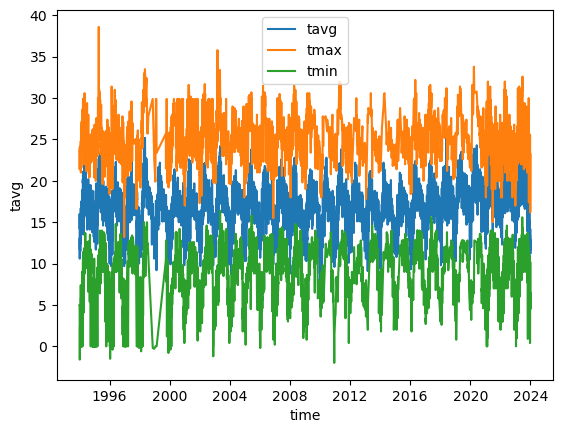

In [17]:
sns.lineplot(x='time', y='tavg', data=data, label='tavg')
sns.lineplot(x='time', y='tmax', data=data, label='tmax')
sns.lineplot(x='time', y='tmin', data=data, label='tmin')

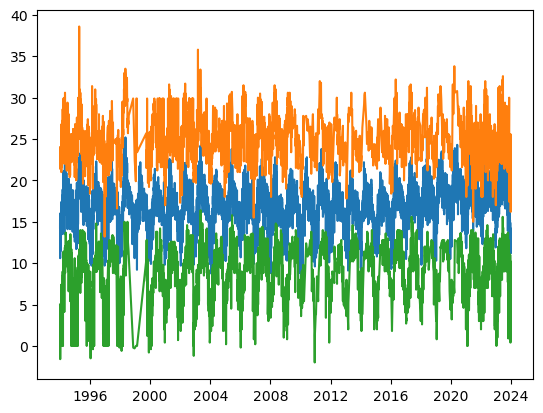

In [18]:
plt.plot(data.index, data['tavg'], label='tavg')
plt.plot(data.index, data['tmax'], label='tmax')
plt.plot(data.index, data['tmin'], label='tmin')

## Monthly

In [19]:
from meteostat import Monthly

data = Monthly('76685', start=start, end=end)
data = data.fetch()

data.head()

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
1994-01-01,13.9,NaN,NaN,4.6,NaN,NaN,NaN
1994-02-01,15.9,NaN,NaN,2.8,NaN,NaN,NaN
1994-03-01,18.1,NaN,NaN,NaN,NaN,NaN,NaN
1994-04-01,18.7,NaN,NaN,NaN,NaN,NaN,NaN
1994-05-01,19.4,NaN,NaN,NaN,NaN,NaN,NaN


### Aggregate

Aggregating the monthly data by year.

In [20]:
data = Monthly('76685', start=start, end=end)
data = data.normalize()
data = data.aggregate('1YE')
data = data.fetch()

data.head()

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
1994-12-31,16.9,NaN,NaN,318.9,NaN,NaN,0.0
1995-12-31,17.2,NaN,NaN,976.1,NaN,NaN,0.0
1996-12-31,16.5,NaN,NaN,944.7,NaN,1008.5,56520.0
1997-12-31,16.5,NaN,NaN,839.0,NaN,1008.0,102180.0
1998-12-31,17.3,9.6,24.1,1008.0,NaN,1007.9,126300.0


## Normals

Getting the normals for the created point of interest.

In [22]:
from meteostat import Normals

normals = Normals(puebla, start=1991, end=2020)
normals = normals.fetch()

normals.head()

,tavg,tmin,tmax,prcp,wspd,pres,tsun
month,,,,,,,
1,14.4,5.9,22.9,6.6,NaN,1014.0,16850.8
2,16.4,7.5,25.3,4.4,NaN,1011.0,15914.1
3,18.0,9.2,26.9,10.0,NaN,1008.5,17841.2
4,20.3,11.7,28.9,24.2,NaN,1006.6,16931.2
5,20.2,12.5,27.9,74.8,NaN,1007.4,15945.0
